In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import shutil
import pathlib
from collections import Counter

from sklearn.decomposition import PCA, SparsePCA, TruncatedSVD, IncrementalPCA
from scipy.sparse import csr_matrix, lil_matrix
import scipy
from itertools import chain
import statistics
from sklearn.utils import class_weight
from sklearn.pipeline import make_pipeline
from sklearn import svm, preprocessing
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from numpy import expand_dims

from tensorflow.keras.utils import to_categorical
from tensorflow import concat
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random
import tensorflow
import os
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras import layers, Input
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, GlobalAveragePooling2D, GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras import applications
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.applications.vgg19 import preprocess_input
from tensorflow.image import rgb_to_grayscale, grayscale_to_rgb
from tensorflow import tile
from tqdm import tqdm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import keras_tuner as kt 
image_size = 224
input_shape = (image_size, image_size, 3)

2023-09-18 11:02:32.416752: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-18 11:02:32.441121: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-18 11:02:32.604535: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-18 11:02:32.605671: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-18 11:02:33.354261: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

## Configuration des dossiers

In [2]:
from pathlib import Path
# importation des données
os.chdir(os.path.expanduser("/home/jfalck/PycharmProjects/drawinganalyses"))
LOCAL_DATA_DIR = Path("/home/jfalck/PycharmProjects/drawinganalyses/drawinganalyses/data/Humans")

# Dossier de stockages des modeles
MODEL_DATA_DIR = Path("/home/jfalck/PycharmProjects/drawinganalyses/drawinganalyses/models/Humans")


## Importation des données

In [3]:


categories = []
for folder in os.listdir(LOCAL_DATA_DIR):
    if os.path.isdir(os.path.join(LOCAL_DATA_DIR, folder)):
        categories.append(os.path.join(LOCAL_DATA_DIR, folder))

drawings = []
labels = []
indices = []

for folder in tqdm(categories):
    labels.append(pathlib.PurePath(folder).name)
    print("Chargement des images du dossier" , folder)
    for img in os.listdir(folder):
            if not img.startswith('.'):
                indices.append(os.path.join(folder, img))
                img = load_img(os.path.join(folder, img), target_size=(224,224,3))
                img = img_to_array(img)
                img = expand_dims(img,axis=0)
                img = preprocess_input(img)
                img = np.array(img)
                img = np.reshape(img, (224,224,3))
                drawings.append(img)

  0%|                                                                                                                                                                                                             | 0/10 [00:00<?, ?it/s]

Chargement des images du dossier /home/jfalck/PycharmProjects/drawinganalyses/drawinganalyses/data/Humans/NOV


 10%|███████████████████▋                                                                                                                                                                                 | 1/10 [00:00<00:04,  2.20it/s]

Chargement des images du dossier /home/jfalck/PycharmProjects/drawinganalyses/drawinganalyses/data/Humans/CE1


 20%|███████████████████████████████████████▍                                                                                                                                                             | 2/10 [00:00<00:03,  2.08it/s]

Chargement des images du dossier /home/jfalck/PycharmProjects/drawinganalyses/drawinganalyses/data/Humans/EXP


 30%|███████████████████████████████████████████████████████████                                                                                                                                          | 3/10 [00:01<00:03,  1.95it/s]

Chargement des images du dossier /home/jfalck/PycharmProjects/drawinganalyses/drawinganalyses/data/Humans/Crèche


 40%|██████████████████████████████████████████████████████████████████████████████▊                                                                                                                      | 4/10 [00:01<00:02,  2.08it/s]

Chargement des images du dossier /home/jfalck/PycharmProjects/drawinganalyses/drawinganalyses/data/Humans/GS


 50%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                  | 5/10 [00:02<00:02,  2.09it/s]

Chargement des images du dossier /home/jfalck/PycharmProjects/drawinganalyses/drawinganalyses/data/Humans/CM2


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 6/10 [00:02<00:01,  2.04it/s]

Chargement des images du dossier /home/jfalck/PycharmProjects/drawinganalyses/drawinganalyses/data/Humans/PS


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 7/10 [00:03<00:01,  2.03it/s]

Chargement des images du dossier /home/jfalck/PycharmProjects/drawinganalyses/drawinganalyses/data/Humans/CE2


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 8/10 [00:03<00:00,  2.16it/s]

Chargement des images du dossier /home/jfalck/PycharmProjects/drawinganalyses/drawinganalyses/data/Humans/CM1


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 9/10 [00:04<00:00,  2.13it/s]

Chargement des images du dossier /home/jfalck/PycharmProjects/drawinganalyses/drawinganalyses/data/Humans/MS


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.09it/s]


## Afficher une image aléatoire

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


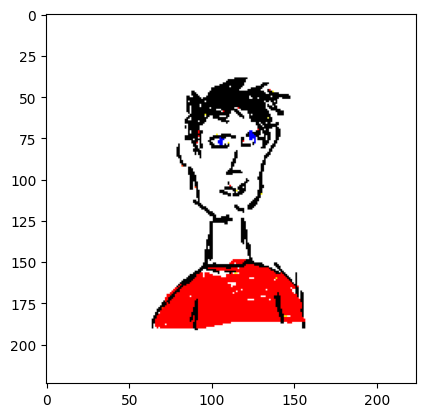

In [4]:
import random

random_index_category = random.randint(0, len(categories)-1)
random_index_drawing = random.randint(0, len(os.listdir(os.path.join(LOCAL_DATA_DIR,categories[random_index_category])))-1)
random_drawing_name = os.listdir(os.path.join(LOCAL_DATA_DIR,categories[random_index_category]))[random_index_drawing]
random_drawing = os.path.join(LOCAL_DATA_DIR,categories[random_index_category],
                              random_drawing_name)
random_img = load_img(random_drawing, target_size=(224,224,3))
random_img = img_to_array(random_img)
random_img = expand_dims(random_img,axis=0)
random_img = preprocess_input(random_img)
random_img = np.array(random_img)
random_img = np.reshape(random_img,(224,224,3))
plt.imshow(random_img)


## Preprocessing + modèle

##### drawings_new = Array des dessins de la classification en question
##### labels_names = Nom de la classe d'appartenance de chaque dessin (Crèche, PS, etc)
##### labels_final = Nom de la classe utilisée pour la classification (jeune,...)

In [5]:
print(categories)

['/home/jfalck/PycharmProjects/drawinganalyses/drawinganalyses/data/Humans/NOV', '/home/jfalck/PycharmProjects/drawinganalyses/drawinganalyses/data/Humans/CE1', '/home/jfalck/PycharmProjects/drawinganalyses/drawinganalyses/data/Humans/EXP', '/home/jfalck/PycharmProjects/drawinganalyses/drawinganalyses/data/Humans/Crèche', '/home/jfalck/PycharmProjects/drawinganalyses/drawinganalyses/data/Humans/GS', '/home/jfalck/PycharmProjects/drawinganalyses/drawinganalyses/data/Humans/CM2', '/home/jfalck/PycharmProjects/drawinganalyses/drawinganalyses/data/Humans/PS', '/home/jfalck/PycharmProjects/drawinganalyses/drawinganalyses/data/Humans/CE2', '/home/jfalck/PycharmProjects/drawinganalyses/drawinganalyses/data/Humans/CM1', '/home/jfalck/PycharmProjects/drawinganalyses/drawinganalyses/data/Humans/MS']


In [6]:
print(labels)

['NOV', 'CE1', 'EXP', 'Crèche', 'GS', 'CM2', 'PS', 'CE2', 'CM1', 'MS']


### Séparations en catégories à préciser

In [7]:
def preprocess_data(groupes):
    nb_groupes = len(groupes)

    labels_groupes = {}
    index_groupes = {}

    for groupe in list(groupes.keys()): # pour chaque groupe
        labels_groupes[groupe] = [labels[j] for j,x in enumerate(labels) if x in groupes[groupe]]
        index_groupes[groupe] = [j for j,x in enumerate(labels) if x in groupes[groupe]]

    index_length = [len(index_groupes[groupe]) for groupe in groupes]

    for groupe, nb_dessins in zip(list(groupes.keys()), index_length):
        print(f'{groupe} : {nb_dessins}')

    labels_index = sorted(sum(list(index_groupes.values()), []))

    labels_names = []
    drawings_new = []
    for i in tqdm(labels_index):
        labels_names.append(labels[i])
        drawings_new.append(drawings[i])

    labels_final = [''] * len(labels_names)

    for i in range(len(labels_final)):
        for grp_index in range(len(list(groupes.keys()))):
            if labels_names[i] in list(groupes.values())[grp_index]:
                labels_final[i] = list(groupes.keys())[grp_index]
    return drawings_new, labels_final, labels_names

In [8]:
groupes = {'CrecheGS' : ['Crèche','PS','MS','GS'],'CE1CM2' : ['CE1','CE2','CM1','CM2']}
drawings_new, labels_final, labels_names = preprocess_data(groupes)

CrecheGS : 4
CE1CM2 : 4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 203360.19it/s]


#### Afficher une image aléatoire

In [9]:
i = random.randint(0,len(labels_names))
print('Catégorie du dessinateur : ' + labels_names[i] + ' (' + labels_final[i] + ')')
plt.imshow(drawings_new[i])

IndexError: list index out of range

### Toutes les catégories humains (Crèche, PS, MS,..., Nov, Exp) 

In [ ]:
categories_humains = ['Crèche','PS','MS','GS','CE1','CE2','CM1','CM2','NOV','EXP']

labels_final = []
drawings_new = []

for i in range(len(labels)):
    if labels[i] in categories_humains:
        drawings_new.append(drawings[i])
        labels_final.append(labels[i])

### 2 groupes d'enfants VS adultes (en décalant à chaque fois chez les enfants)

#### Optimisation bayésienne : meilleurs hyperparamètres pour chaque modèle

In [ ]:
def plot_model_history(model_history, accuracy='accuracy', val_accuracy='val_accuracy'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[accuracy])+1),model_history.history[accuracy])
    axs[0].plot(range(1,len(model_history.history[val_accuracy])+1),model_history.history[val_accuracy])
    #axs[0].set_xticks(np.arange(1,len(model_history.history[accuracy])+1),len(model_history.history[accuracy])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    #axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.savefig(os.path.join(MODEL_DATA_DIR, str(enfants_groupe[0] + enfants_groupe[1]), 'curves_' + str(enfants_groupe[0] + enfants_groupe[1]) + '.png'))
    plt.show()

##### /!\ lancer ce code fait tourner les modèles

Trial 50 Complete [00h 00m 02s]
val_loss: 0.0

Best val_loss So Far: 0.0
Total elapsed time: 00h 01m 02s
INFO:tensorflow:Oracle triggered exit
{'batch_size': 32, 'pool_value': 'max', 'dropout': 0.0, 'num_layers': 3, 'BatchNorm': 0, 'units_0': 320, 'lr': 0.00902203935993642, 'units_1': 224, 'units_2': 416}
Epoch 1/15
1/1 [==============================] - 1s 768ms/step - loss: 4.5010 - accuracy: 0.3333 - val_loss: 574.0606 - val_accuracy: 0.0000e+00
Epoch 2/15
1/1 [==============================] - 0s 240ms/step - loss: 342.3402 - accuracy: 0.6667 - val_loss: 6.3429e-31 - val_accuracy: 1.0000
Epoch 3/15
1/1 [==============================] - 0s 245ms/step - loss: 47.0082 - accuracy: 0.3333 - val_loss: 20.6647 - val_accuracy: 0.0000e+00
Epoch 4/15
1/1 [==============================] - 0s 250ms/step - loss: 35.3731 - accuracy: 0.6667 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/15
1/1 [==============================] - 0s 229ms/step - loss: 236.9287 - accuracy: 0.3333 - val_loss

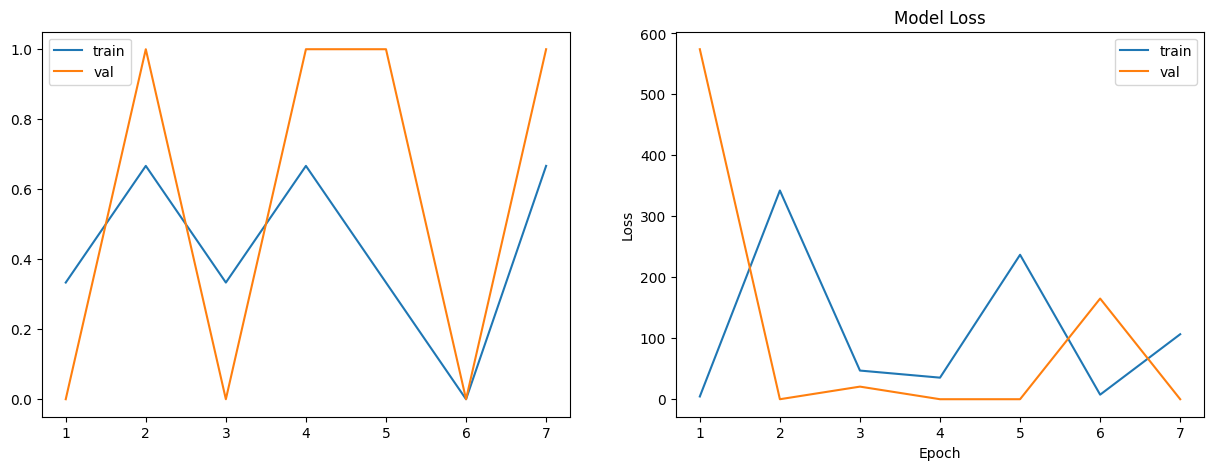

/home/jfalck/PycharmProjects/drawinganalyses/venv/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
enfants = ['Crèche','PS','MS','GS','CE1','CE2','CM1','CM2']
adultes = ['NOV','EXP']

data_augmentation = tf.keras.Sequential(
    [       tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal")
    ]
)

scores = list()



for i in range(len(enfants)-1):
    enfants_groupe = enfants[i:i+2]
    print('********************Loop running for ' + enfants_groupe[0] + enfants_groupe[1] + ' ********************')
    
    # si le code n'a pas encore tourné complètement pour ces catégories :
    path_model= os.path.join(MODEL_DATA_DIR,str(enfants_groupe[0] + enfants_groupe[1]),str(enfants_groupe[0] + enfants_groupe[1] +'.h5'))
    if not os.path.isfile(path_model):
        # mise en forme des données :
        groupes = {enfants_groupe[0]+enfants_groupe[1]:enfants_groupe, adultes[0]+adultes[1]:adultes}
        drawings_new, labels_final, labels_names = preprocess_data(groupes)
        drawings_new = np.reshape(drawings_new,(len(drawings_new),224,224,3))
        for label_idx in range(len(labels_final)):
            if labels_final[label_idx] != 'NOVEXP':
                labels_final[label_idx] = '0' + labels_final[label_idx]
            else:
                labels_final[label_idx] = '1' + labels_final[label_idx]
        le = LabelEncoder()
        labels_final = le.fit_transform(labels_final)
        X_train, X_val, Y_train, Y_val = train_test_split(drawings_new,labels_final, test_size = 0.2, random_state = 42)
        
        # optimisation bayésienne
        class MyHyperModel(kt.HyperModel):
            def model_builder(self,hp):
                '''
            Args:
            hp - Keras tuner object
                '''
                batch_size=hp.Choice("batch_size", [16, 32, 64])
                # 3 possibilités pour pool à partir de VGG : avg, max, None
                pool_value = hp.Choice('pool_value',values=['avg','max','None'])
                if pool_value == 'None': # si None, il faut le type None
                    pool_value = None

                inputs = tf.keras.Input(shape=(224,224,3))
                inputs = data_augmentation(inputs) 
                x = keras.applications.vgg19.VGG19(
                input_tensor=inputs, 
                include_top=False,
                pooling=pool_value,
                weights='imagenet'
                )

                x.trainable = False
                x = Flatten()(x.output)
                hp_dropout = hp.Float('dropout', min_value=0, max_value=0.4, step=0.1)
                x = Dropout(hp_dropout)(x)
                # Tune the number of layers
                nb_layers = hp.Int("num_layers", 1, 3)
                BatchNorm = hp.Choice('BatchNorm',[True,False])
                for num_layer in range(nb_layers):
                    # Tune the number of neurons in each layer
                    hp_units = hp.Int(f'units_{num_layer}', min_value=32, max_value=512, step=32)  
                    x = Dense(hp_units)(x)
                    if num_layer==0:
                        with hp.conditional_scope("BatchNorm", [True]):
                            if BatchNorm == True:
                                x = BatchNormalization()(x)
                    x = Activation('relu')(x)
                outputs = Dense(1, activation='sigmoid')(x)
                model = Model(inputs,outputs)
                learning_rate = hp.Float("lr", min_value=1e-5, max_value=1e-1, sampling="log")
                model.compile(loss='binary_crossentropy',
                      optimizer=optimizers.SGD(learning_rate),
                      metrics=['accuracy'])
                return model

            def fit(self, hp, model, *args, **kwargs):
                return model.fit(
                    *args,
                    batch_size=self.batch_size,
                    **kwargs,
                )

        # Instantiate the tuner
        tuner = kt.tuners.BayesianOptimization(
        MyHyperModel().model_builder,
        objective = 'val_loss',
        max_trials = 50, ###########################
        directory = os.path.join(MODEL_DATA_DIR),
    #        overwrite = True,
        project_name = str(enfants_groupe[0] + enfants_groupe[1]))

        tuner.search_space_summary()
        early_stop_tuner = tf.keras.callbacks.EarlyStopping(
                                monitor = 'val_loss',
                                patience = 3, ##############################################
                                restore_best_weights = True)
        
        
        class_weights = class_weight.compute_class_weight(
                                class_weight = "balanced",
                                classes = np.unique(Y_train),
                                y = Y_train                                                    
                            )
        class_weight_dict = dict(enumerate(class_weights))
        tuner.search(X_train, Y_train, epochs=15, ##########################
                     validation_data=(X_val, Y_val), verbose=2, callbacks = [early_stop_tuner],
                     class_weight = class_weight_dict) 
        # Get the top 2 hyperparameters.
        #best_hps = tuner.get_best_hyperparameters(5)
        best_hps = tuner.get_best_hyperparameters()[0]
        print(best_hps.values)
        # Build the model with the best hp.
        best_model = MyHyperModel().model_builder(best_hps)
        early_stop = tf.keras.callbacks.EarlyStopping(
                                monitor = 'val_loss',
                                patience = 3, ##############################################
                                restore_best_weights = True)

        history = best_model.fit(X_train,Y_train, epochs=15, validation_data=(X_val,Y_val), ############################
                        callbacks = [early_stop], class_weight = class_weight_dict)
        plot_model_history(history)

        epoch_val_loss_min = np.argmin(history.history['val_loss'])
        val_max = history.history['val_accuracy'][epoch_val_loss_min]
        path_model= os.path.join(MODEL_DATA_DIR,str(enfants_groupe[0] + enfants_groupe[1]),'models_scores.txt')
        with open(path_model, 'a') as f:
            f.writelines('accuracy : ' + str(val_max) + '\n' + str(best_hps.values))
        scores.append(val_max)
        best_model.save(os.path.join(MODEL_DATA_DIR, 
                                     str(enfants_groupe[0] + enfants_groupe[1]),
                                     str(enfants_groupe[0] + enfants_groupe[1]+ '.h5')))
    for folder in os.listdir(os.path.join(MODEL_DATA_DIR ,str(enfants_groupe[0] + enfants_groupe[1]))):
        if 'trial' in folder:
            shutil.rmtree(os.path.join(MODEL_DATA_DIR,str(enfants_groupe[0] + enfants_groupe[1]),folder))

In [10]:
enfants = ['Crèche','PS','MS','GS','CE1','CE2','CM1','CM2']

categories_couple = []
for i in range(len(enfants)-1):
    enfants_groupe = enfants[i:i+2]
    categories_couple.append(enfants_groupe[0] + enfants_groupe[1])

In [11]:
scores = []
for categorie_couple in categories_couple:
    with open(os.path.join(MODEL_DATA_DIR, categorie_couple,'models_scores.txt')) as f:
        lines = f.readlines()
        print(lines)
    scores.append(float(lines[0].split(':')[1]))
    

['accuracy : 1.0\n', "{'batch_size': 32, 'pool_value': 'max', 'dropout': 0.0, 'num_layers': 1, 'BatchNorm': 0, 'units_0': 64, 'lr': 0.05697016903103457, 'units_1': 480, 'units_2': 256}"]
['accuracy : 1.0\n', "{'batch_size': 64, 'pool_value': 'None', 'dropout': 0.30000000000000004, 'num_layers': 1, 'BatchNorm': 0, 'units_0': 416, 'lr': 0.006596180810736199}"]
['accuracy : 1.0\n', "{'batch_size': 64, 'pool_value': 'None', 'dropout': 0.1, 'num_layers': 2, 'BatchNorm': 0, 'units_0': 128, 'lr': 0.013774049532041123, 'units_1': 32}"]
['accuracy : 1.0\n', "{'batch_size': 64, 'pool_value': 'None', 'dropout': 0.2, 'num_layers': 2, 'BatchNorm': 0, 'units_0': 352, 'lr': 0.02548593086517296, 'units_1': 192, 'units_2': 352}"]
['accuracy : 1.0\n', "{'batch_size': 16, 'pool_value': 'max', 'dropout': 0.30000000000000004, 'num_layers': 3, 'BatchNorm': 0, 'units_0': 256, 'lr': 0.01634224658884753, 'units_1': 352, 'units_2': 320}"]
['accuracy : 1.0\n', "{'batch_size': 16, 'pool_value': 'None', 'dropout':

In [12]:
print(scores)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


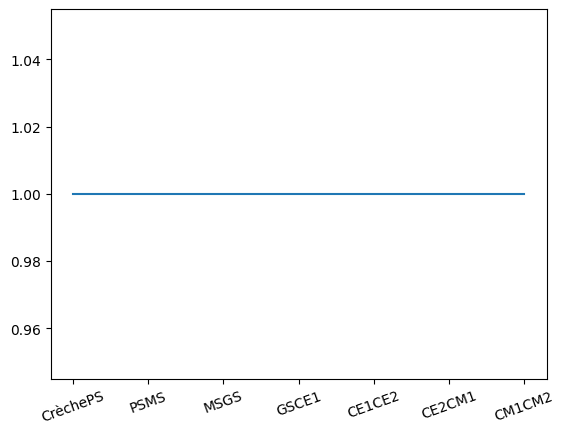

In [13]:
plt.xticks(list(range(len(enfants)-1)), categories_couple,
       rotation=20)
plt.plot(scores)